<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Importing pandas and creating a helper function

#### feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [326]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**creating a countplot**

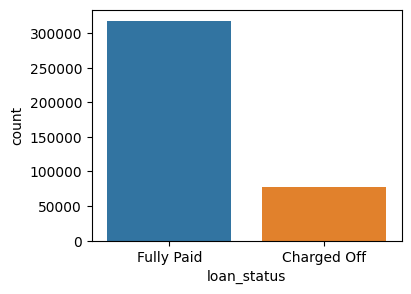

In [328]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='loan_status', hue='loan_status')
plt.show()

**Creating a histogram of the loan_amnt column.**

In [329]:
%matplotlib inline

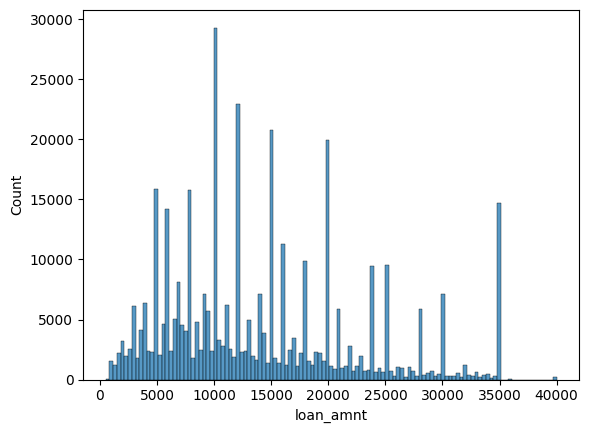

In [330]:
sns.histplot(data=df, x='loan_amnt')
plt.show()

**Exploring correlation between the continuous feature variables. Calculating the correlation between all continuous numeric variables using .corr() method.**

In [331]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualizing this using a heatmap**

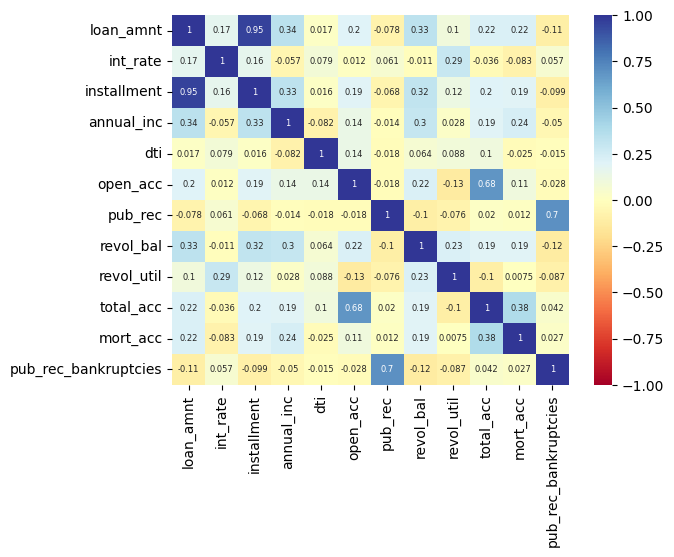

In [332]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True, annot_kws={"size":6}, center= 0, vmin=-1, cmap="RdYlBu")
plt.show()

**Note a almost perfect correlation with the "installment" feature. Let's explore this feature further.**

In [333]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [334]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


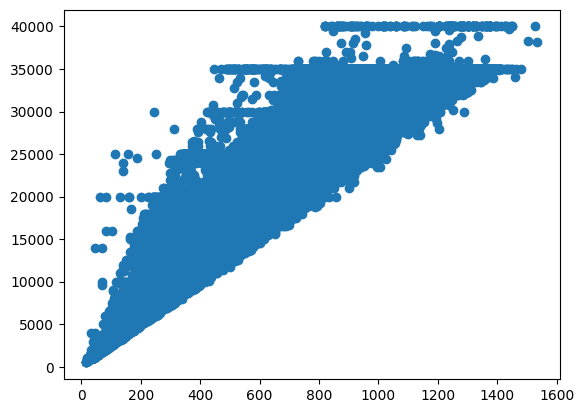

In [335]:
plt.scatter(x=df['installment'], y=df['loan_amnt'])
plt.show()

**Creating a boxplot showing the relationship between the loan_status and the Loan Amount.**

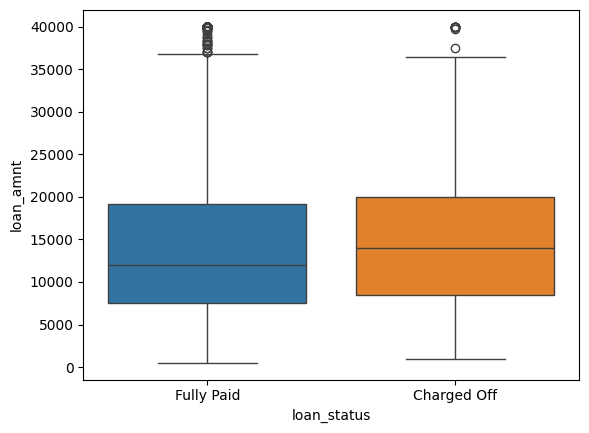

In [336]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt', hue='loan_status')
plt.show()

**Calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [337]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [338]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [339]:
subgrade_order = np.sort(list(df['sub_grade'].unique()))
subgrade_order

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype='<U2')

**Creating a countplot per grade with hue = loan_status label.**

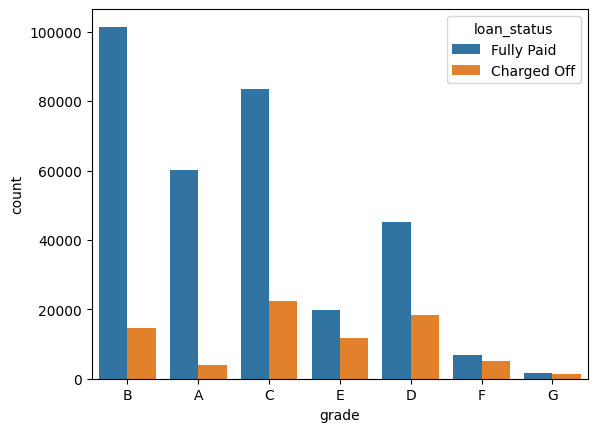

In [340]:
sns.countplot(data=df, x='grade', hue='loan_status')
plt.show()

**Displaying a count plot per subgrade.**

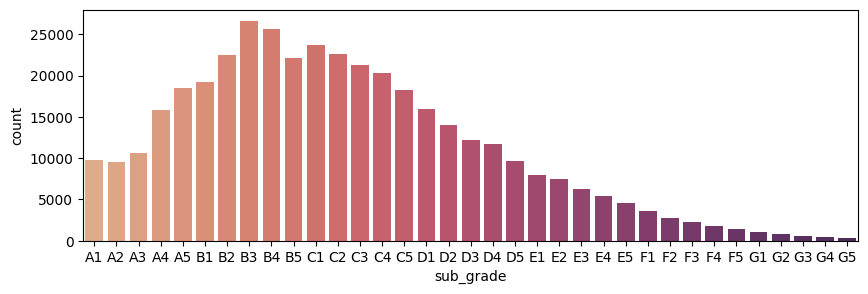

In [341]:
plt.figure(figsize=(10,3))
sns.countplot(x=df['sub_grade'], order=subgrade_order, hue=df['sub_grade'], hue_order=subgrade_order, palette='flare')
plt.show()

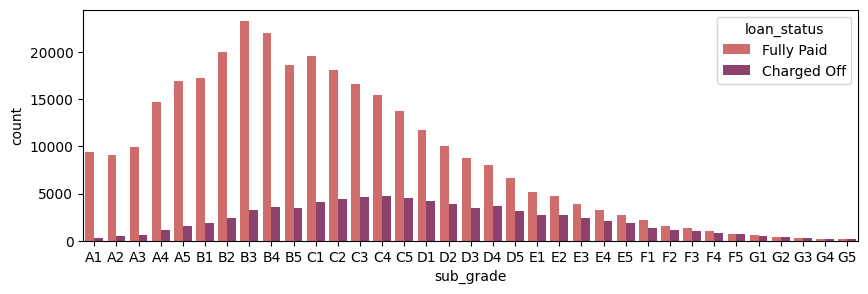

In [342]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, x='sub_grade', order=subgrade_order, hue='loan_status', palette='flare')
plt.show()

**Realizing that F and G subgrades don't get paid back that often, we isloate those and recreate the countplot just for those subgrades.**

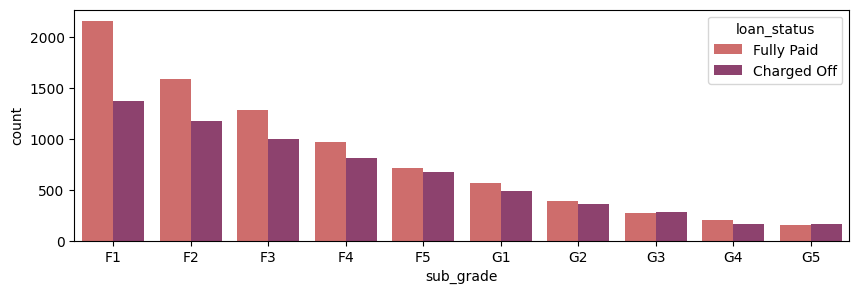

In [343]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, x='sub_grade', order=subgrade_order[-10:], hue='loan_status', palette='flare')
plt.show()

**Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [344]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [345]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column**

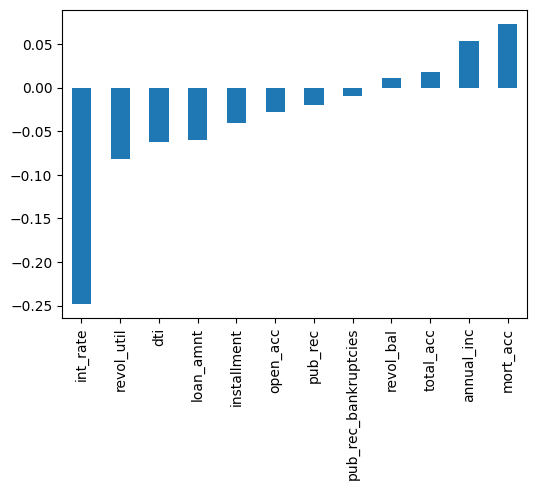

In [346]:
plt.figure(figsize=(6,4))
df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values().plot.bar()
plt.show()

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [347]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [348]:
len(df)

396030

**Creating a Series that displays the total count of missing values per column.**

In [349]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Converting this Series to be in term of percentage of the total DataFrame**

In [350]:
((df.isnull().sum())/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examining emp_title and emp_length to see whether it will be okay to drop them**

In [351]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [352]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Checking how many unique employment job titles there are**

In [353]:
len(df['emp_title'].unique())

173106

In [354]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

**There are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [355]:
df = df.drop('emp_title', axis=1)

In [356]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**Creating a count plot of the emp_length feature column**

In [357]:
emp_leght_list = list(df['emp_length'].sort_values().unique())[:-1]
emp_leght_list =['< 1 year',
                 '1 year',
                 '2 years',
                 '3 years',
                 '4 years',
                 '5 years',
                 '6 years',
                 '7 years',
                 '8 years',
                 '9 years',
                 '10+ years']

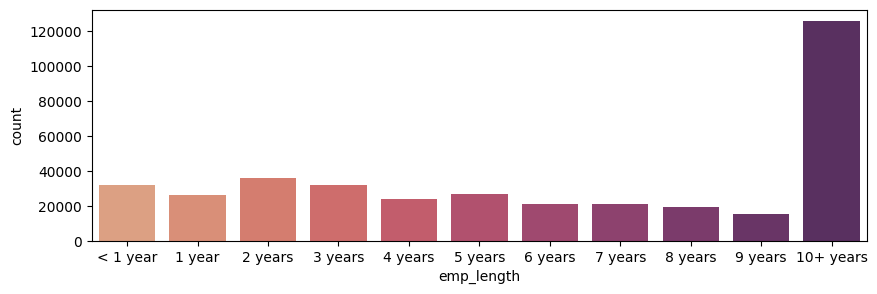

In [358]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, x='emp_length', hue='emp_length', order=emp_leght_list, hue_order=emp_leght_list, palette='flare', legend=False)
plt.show()

**Plotting out the countplot with a hue separating Fully Paid vs Charged Off**

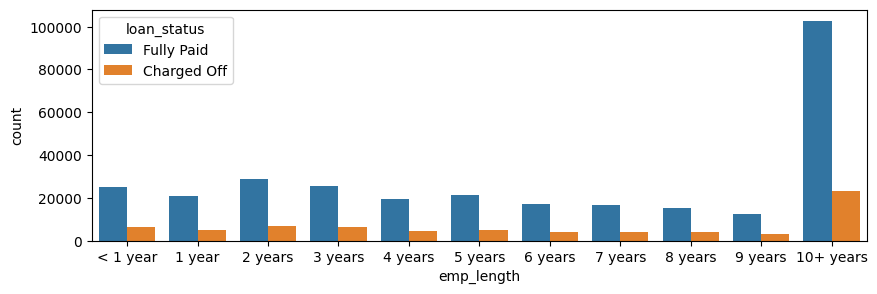

In [359]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, x='emp_length', hue='loan_status', order=emp_leght_list)
plt.show()

**Checking the percentage of charge offs per category.**

In [360]:
percent_by_emp_lenght={}
for lenght in emp_leght_list:
    percent_by_emp_lenght[lenght] = df[df['emp_length']==lenght].groupby(df['loan_status']).describe().iloc[:,0].iloc[0]/df[df['emp_length']==lenght].groupby(df['loan_status']).describe().iloc[:,0].iloc[1] *100

percent_by_emp_lenght = pd.Series(data=percent_by_emp_lenght)

In [361]:
percent_by_emp_lenght = pd.Series(data=percent_by_emp_lenght)

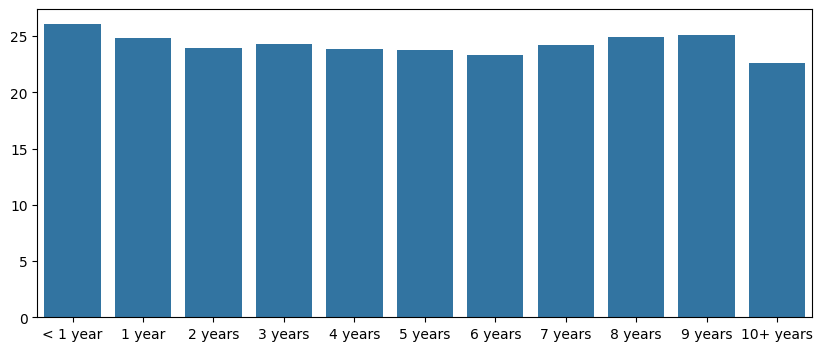

In [362]:
plt.figure(figsize=(10,4))
sns.barplot(data=percent_by_emp_lenght)
plt.show()

**Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [363]:
df=df.drop('emp_length', axis=1)

**Seeing which feature columns still have missing data.**

In [364]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Comparing the title column vs the purpose column**

In [365]:
df.purpose.head(10), df.title.head(10)

(0              vacation
 1    debt_consolidation
 2           credit_card
 3           credit_card
 4           credit_card
 5    debt_consolidation
 6      home_improvement
 7           credit_card
 8    debt_consolidation
 9    debt_consolidation
 Name: purpose, dtype: object,
 0                   Vacation
 1         Debt consolidation
 2    Credit card refinancing
 3    Credit card refinancing
 4      Credit Card Refinance
 5         Debt consolidation
 6           Home improvement
 7       No More Credit Cards
 8         Debt consolidation
 9         Debt Consolidation
 Name: title, dtype: object)

**The title column is simply a string subcategory/description of the purpose column**

In [366]:
df=df.drop('title', axis=1)

**Finding out what the mort_acc feature represents**

In [367]:
feat_info('mort_acc')

Number of mortgage accounts.


**Creating a value_counts of the mort_acc column.**

In [368]:
df.mort_acc.value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [369]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense. So we will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry**

In [370]:
avg_mort_acc = df['mort_acc'].groupby(df['total_acc']).describe()['mean']
avg_mort_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mean, Length: 118, dtype: float64

In [371]:
avg_mort_acc = pd.DataFrame(avg_mort_acc)

In [372]:
avg_mort_acc

,mean
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [373]:
avg_mort_acc['mean'][2]

0.0

**Let's fill in the missing mort_acc values based on their total_acc value.**

In [377]:
def set_mean(total_acc, mort_acc, avg_mort_acc):
    mort_acc = avg_mort_acc['mean'][total_acc]
    return mort_acc

In [388]:
from math import isnan

In [390]:
df['mort_acc_not_nan'] = df.apply(lambda x: set_mean(x.total_acc, x.mort_acc, avg_mort_acc) if isnan(x.mort_acc) else x.mort_acc, axis=1)

In [393]:
df = df.drop('mort_acc', axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,loan_repaid,mort_acc_not_nan
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0.0
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,3.0
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0.0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0.0
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1.0


In [394]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
mort_acc_not_nan          0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data**

In [395]:
df = df.dropna(axis=0)

In [396]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
mort_acc_not_nan        0
dtype: int64

## Categorical Variables and Dummy Variables

In [398]:
list(df.select_dtypes(include=['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type**

In [400]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))
df['term']

C:\Users\luca_\AppData\Local\Temp\ipykernel_9692\298927409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda x: int(x[:3]))


0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [403]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

### grade feature

**grade is part of sub_grade**

In [405]:
df = df.drop('grade', axis=1)

**Converting the subgrade into dummy variables. Concatenating these new columns to the original dataframe**

In [407]:
sub_grades_df = pd.get_dummies(df['sub_grade'], drop_first=True)
sub_grades_df

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [414]:
df_dummies = pd.concat([df, sub_grades_df],axis=1)
df_dummies = df_dummies.drop('sub_grade', axis=1)
df_dummies.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'mort_acc_not_nan', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [410]:
list(df.select_dtypes(include=['object']).columns)

['sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### verification_status, application_type,initial_list_status,purpose 
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe**

In [ ]:
verification_status_df = pd.get_dummies(df['verification_status'], drop_first=True)
application_type_df = pd.get_dummies(df['application_type'], drop_first=True)
initial_list_status_df = pd.get_dummies(df['initial_list_status'], drop_first=True)
purpose_df = pd.get_dummies(df['purpose'], drop_first=True)

In [416]:
df_dummies = df_dummies.drop(['verification_status','application_type','initial_list_status','purpose'], axis=1)

In [417]:
df_dummies = pd.concat([df_dummies,verification_status_df,application_type_df,initial_list_status_df,purpose_df], axis=1)

In [421]:
len(df_dummies)

395219

### home_ownership

**Converting these to dummy variables, but replacing none and any with other.**

In [427]:
def is_other(string):
    if string == 'NONE' or string=='ANY':
        return True

In [428]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if is_other(x) else x)

In [430]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [431]:
home_ownership_df = pd.get_dummies(df['home_ownership'], drop_first=True)
df_dummies = df_dummies.drop('home_ownership', axis=1)
df_dummies = pd.concat([df_dummies,home_ownership_df], axis=1)

### address
**Let's feature engineer a zip code column from the address in the data set, creating a column called 'zip_code' that extracts the zip code from the address column.**

In [440]:
df_dummies['zip_code'] = df_dummies['address'].apply(lambda x: x[-5:])

'48052'

**Now make this zip_code column into dummy variables using pandas**

In [442]:
zip_code_df = pd.get_dummies(df_dummies['zip_code'], drop_first=True)
df_dummies = df_dummies.drop(['zip_code','address'], axis=1)
df_dummies = pd.concat([df_dummies,zip_code_df], axis=1)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so we drop this feature.**

In [444]:
df_dummies = df_dummies.drop(['issue_d'], axis=1)

In [445]:
df_dummies.head(1)

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,B4,117000.0,Fully Paid,26.24,Jun-1990,16.0,...,True,False,False,True,False,False,False,False,False,False


### earliest_cr_line
**converting it to a numeric feature**

In [447]:
df_dummies['earliest_cr_year'] = df_dummies['earliest_cr_line'].apply(lambda x: x[-4:])

In [453]:
df_dummies['earliest_cr_year'] = df_dummies['earliest_cr_year'].apply(int)

In [450]:
df_dummies = df_dummies.drop(['earliest_cr_line'], axis=1)

In [455]:
df_dummies = df_dummies.drop(['sub_grade'], axis=1)

In [456]:
list(df_dummies.select_dtypes(include=['object']).columns)

['loan_status']

**dropping the load_status column we created earlier**

In [457]:
df_dummies = df_dummies.drop(['loan_status'], axis=1)

## Train Test Split

In [458]:
from sklearn.model_selection import train_test_split

In [459]:
X = df_dummies.drop('loan_repaid', axis=1)
y = df_dummies['loan_repaid']

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [462]:
from sklearn.preprocessing import MinMaxScaler

In [463]:
scaler = MinMaxScaler()

In [464]:
scaler.fit(X_train)

MinMaxScaler()

In [465]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the Model

In [466]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Building a sequential model**

In [467]:
model = Sequential([
    Dense(78, activation='relu'),
    Dense(39, activation='relu'),
    Dense(19, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer="Adam",
    loss='binary_crossentropy',
    metrics=['Accuracy', 'F1Score']
)

**Fitting the model to the training data.**

In [468]:
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=256, validation_data=(X_test_scaled, y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.8587 - F1Score: 0.8914 - loss: 0.3337 - val_Accuracy: 0.8848 - val_F1Score: 0.8901 - val_loss: 0.2682
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.8889 - F1Score: 0.8923 - loss: 0.2619 - val_Accuracy: 0.8781 - val_F1Score: 0.8901 - val_loss: 0.2757
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.8878 - F1Score: 0.8917 - loss: 0.2615 - val_Accuracy: 0.8872 - val_F1Score: 0.8901 - val_loss: 0.2633
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.8888 - F1Score: 0.8914 - loss: 0.2594 - val_Accuracy: 0.8875 - val_F1Score: 0.8901 - val_loss: 0.2624
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.8884 - F1Score: 0.8914 - loss: 0.2582 - val_Accuracy: 0.8875 - val_F1Score: 0.8901 - val_loss: 0.2627
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.8883 - F1Score: 0.8912 - loss: 0.2585 - val_Accuracy: 0.8875 - val_F1Score: 0.8901

# Section 3: Evaluating Model Performance.

In [497]:
from sklearn.metrics import confusion_matrix, classification_report

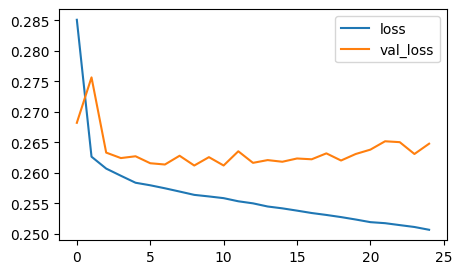

In [504]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [505]:
y_pred = model.predict(X_test_scaled)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step


In [509]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [510]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [511]:
print(confusion_matrix(y_test, y_pred))

[[ 7245  8413]
 [  502 62884]]


**Checking a prdeiction with a random customer from the data**

In [514]:
import random
random.seed(101)
random_ind = random.randint(0,len(df_dummies))

new_customer = df_dummies.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [520]:
new_customer = np.asarray(new_customer).astype('float32')

In [536]:
new_customer = scaler.transform(new_customer.reshape(1,78))

C:\Users\luca_\anaconda3\envs\Python_for_DS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [524]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 78)                  │           6,162 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 39)                  │           3,081 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,071 (117.47 KB)

 Trainable params: 10,023 (39.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,048 (78.32 KB)

In [541]:
np.round(model.predict(new_customer))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.]], dtype=float32)

**Checking if the customer actually paid the loan**

In [530]:
df_dummies.loc[random_ind]['loan_repaid']

1